SADFasf asf asfasf as ASf a

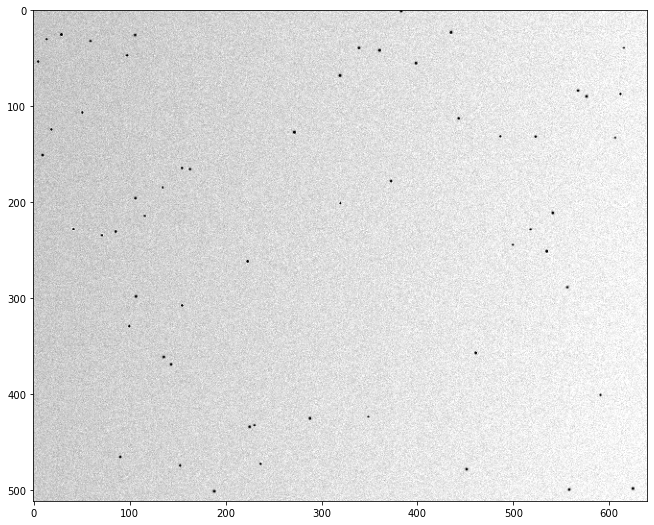

In [2]:
from loader import *
from models import *
from utils import *
from plotting import *
im_size_width, im_size_height, radius = 640, 512, 0.3e-6
plankton = stationary_spherical_plankton(im_size_height, im_size_width, radius, label=1)

gradient_amp = 0.5
microscope = plankton_brightfield(im_size_height, im_size_width, gradient_amp)

no_of_planktons = 50
sample = create_sample(plankton, no_of_planktons)

noise_amp = 2
norm_min, norm_max= -0.2, 1.2
image = create_image(noise_amp, sample, microscope, norm_min, norm_max)

plot_image(image)

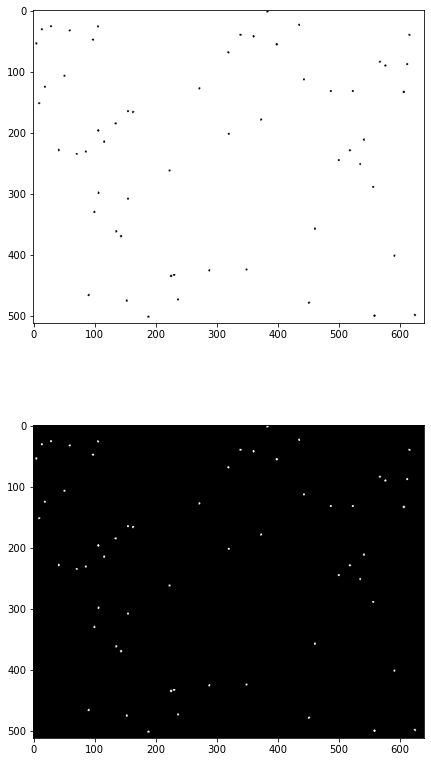

In [3]:
label = get_target_image(image.resolve())
label_function = get_target_image
plot_label(label_function, image)

In [4]:
from deeptrack.generators import ContinuousGenerator
generator = ContinuousGenerator(
    image,
    get_target_image,
    batch_function0,
    batch_size=2,
    min_data_size=4,
    max_data_size=512
    )

In [5]:
no_of_inputs, number_of_outputs = 1, 2
model = generate_unet(im_size_height, im_size_width, no_of_inputs, number_of_outputs)
# model = train_model(model, generator, patience=5, epochs=20, steps_per_epoch=2)

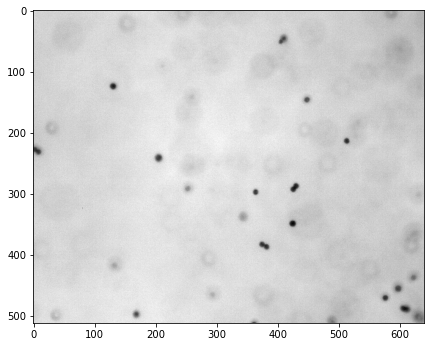

In [6]:
# outputs = ["img", "img", "img", "diff", "diff"]
# output_numbers = [0, 1, 2, [0,1], [1,2]]

outputs = ["img"]
output_numbers = [0]
folder_path = 'E:\Documents\Anaconda\Jupyterkod\Exjobb\Egen kod\Exjobb\From erik\\alexandrium2'
frame_im0 = 44

calculated_mean_image = get_mean_image(folder_path, im_size_width, im_size_height)
im_stack = get_image_stack(outputs=["img"], 
    output_numbers = [0], 
    folder_path = 'E:\Documents\Anaconda\Jupyterkod\Exjobb\Egen kod\Exjobb\From erik\\alexandrium2', 
    frame_im0 = 20, 
    im_size_width = 640, 
    im_size_height = 512)

plot_im_stack(im_stack)

In [7]:
layer = 1
value_threshold = 0.52
no_of_frames = 4

# kwargs = {"outputs":["img"], output_numbers, folder_path, frame_im0, im_size_width, im_size_height, 
#                       model, layer, value_threshold}

positions = extract_positions(
    no_of_frames, 
    outputs=["img"], 
    output_numbers = [0], 
    folder_path = 'E:\Documents\Anaconda\Jupyterkod\Exjobb\Egen kod\Exjobb\From erik\\alexandrium2', 
    frame_im0 = 20, 
    im_size_width = 640, 
    im_size_height = 512,
    model = model, 
    layer = 1, 
    value_threshold=0.5)


In [8]:
positions

[array([[  0.,   0.],
        [125., 132.],
        [149., 448.],
        [215., 514.],
        [233.,   8.],
        [289., 430.],
        [293., 428.],
        [349., 424.],
        [349., 426.],
        [351., 426.],
        [351., 428.],
        [385., 376.],
        [389., 382.],
        [473., 576.],
        [489., 608.]]),
 array([[135., 140.],
        [135., 142.],
        [149., 456.],
        [217., 516.],
        [219., 516.],
        [245., 212.],
        [291., 436.],
        [293., 436.],
        [295., 366.],
        [295., 434.],
        [297., 432.],
        [297., 434.],
        [349., 432.],
        [349., 434.],
        [351., 432.],
        [351., 434.],
        [397., 384.],
        [401., 390.],
        [401., 392.],
        [479., 582.]]),
 array([[249., 224.],
        [289., 364.],
        [295., 444.],
        [295., 446.],
        [297., 444.],
        [297., 446.],
        [299., 444.],
        [301., 444.],
        [351., 452.],
        [351., 454.],
      